In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [3]:
# set the initial weights
# np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [4]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [5]:
print(W1)
print()
print(b1)

[[-0.89588961  1.95906589 -0.4664653  -0.534116  ]
 [ 1.14310461 -0.39358665  0.63691145  0.72709312]]

[ 0.56806874 -1.02272974 -0.13293304 -1.66628452]


In [6]:
print(W2)
print()
print(b2)

[[ 1.03381908 -0.33400234 -0.57575056]
 [ 0.57007912 -0.67624945 -0.47794727]
 [-0.2524952  -1.42076038 -0.39301721]
 [-1.22978129  0.82766609 -0.04296181]]

[ 0.56357923 -1.27981688 -1.19232066]


In [7]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

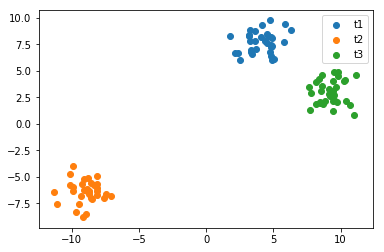

In [10]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [11]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [12]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [13]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [14]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [15]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [16]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [17]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [18]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [19]:
def cost(t, y):
    return -t*np.log(y)

In [20]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [21]:
def error(cost):
    return (cost.sum())/N

In [22]:
err0 = error(cost1)
err0

2.0047284929687383

In [32]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [33]:
acc0 = accuracy(ohe(t), y2)
acc0

1.0

In [ ]:
err_reg = [err0]
acc_reg = [acc0]



In [25]:
# lr = 0.00001
print('initial error: {}'.format(error1))

for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    
    W2 += lr*dw2
    b2 += lr*db2
    W1 += lr*dw1
    b1 += lr*db1    
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

initial error: 2.0047284929687383
error:2.0047284929687383
error:1.6912474840243974
error:1.4330047963627168
error:1.294024632797371
error:1.204442101947474
error:1.1337593029299784
error:1.0724243326143585
error:1.0168690952244877
error:0.9655217143670256
error:0.9176021522156665
error:0.8726889649620807
error:0.8305407021141781
error:0.7910134656897607
error:0.7540181347928734
error:0.719494862783247
error:0.687395565871782
error:0.6576708105496226
error:0.6302601131785199
error:0.6050856892223119
error:0.5820497840229946
error:0.5610353361963066
error:0.5419092567363408
error:0.5245273165174866
error:0.5087396130794543
error:0.49439578153504526
error:0.4813494085859938
error:0.46946139777549833
error:0.4586022573765506
error:0.44865342253722157
error:0.43950779075190627
error:0.4310696654497933
error:0.42325428751778077
error:0.4159871051538059
error:0.40920289919373415
error:0.4028448499086734
error:0.3968636049202493
error:0.39121638704609785
error:0.38586616523718675
error:0.3807

In [34]:
accuracy(ohe(t), y2)

1.0

## Graph

### Constant learning rate

In [ ]:
plt.plot(err_reg)
plt.show()

In [ ]:
plt.plot(err_reg)
plt.show()

###  learning rate

In [ ]:
plt.plot(err_reg)
plt.show()

In [ ]:
plt.plot(err_reg)
plt.show()

###  learning rate

In [ ]:
plt.plot(err_reg)
plt.show()

In [ ]:
plt.plot(err_reg)
plt.show()

# test

In [14]:
lr1 = [0.1]

In [15]:
for i in range(100):
    k = 0.1
    lr1.append(lr1[0]*np.exp(- k * i))

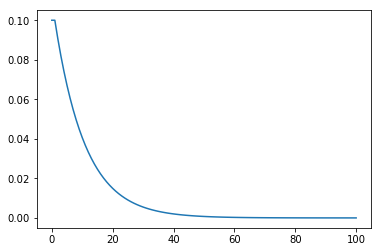

In [16]:
plt.plot(lr)
plt.show()

In [17]:
lr2 = [0.1]

In [18]:
for i in range(100):
    k = 0.1
    lr2.append(lr2[0]/((k * i) + 1))

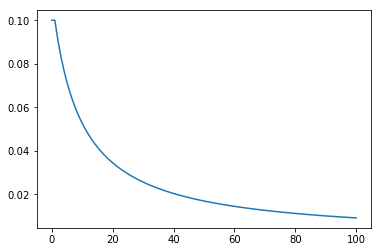

In [19]:
plt.plot(lr2)
plt.show()

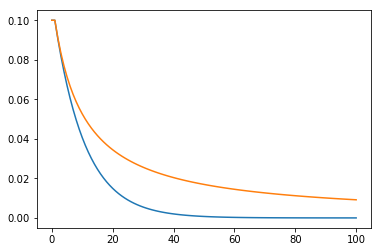

In [20]:
plt.plot(lr1)
plt.plot(lr2)
plt.show()